# Loading dataset

In [1]:
#Sequential API
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer, Dense, Flatten
from tensorflow.keras.datasets import mnist

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[5000:], y_train_full[5000:]

In [3]:
X_train = X_train / 255.
X_train.sum()

1121694.0549019605

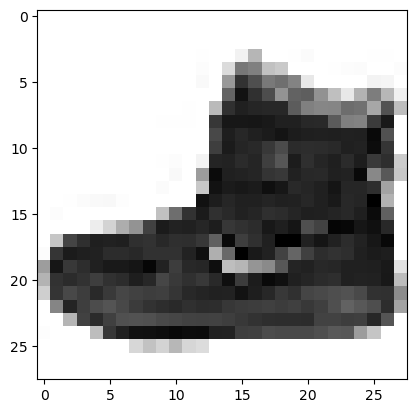

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')

# Sequential API

In [5]:
model = tf.keras.Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

# model = tf.keras.Sequential()
# model.add(Flatten(input_shape=[28, 28]))
# model.add(Dense(300, activation="relu"))
# model.add(Dense(100, activation="relu"))
# model.add(Dense(10, activation="softmax"))

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [8]:
model.compile(optimizer=optimizer,
    loss=loss,
    loss_weights=None,
    metrics=['accuracy'],
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile='auto',
    auto_scale_loss=True)

In [41]:
history = model.fit(X_train, y_train, batch_size=32, validation_data = (X_train, y_train), epochs = 15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9939 - loss: 0.0247 - val_accuracy: 0.9956 - val_loss: 0.0172
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9941 - loss: 0.0236 - val_accuracy: 0.9896 - val_loss: 0.0340
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0652 - val_accuracy: 0.9952 - val_loss: 0.0194
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0258 - val_accuracy: 0.9910 - val_loss: 0.0293
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9927 - loss: 0.0279 - val_accuracy: 0.9856 - val_loss: 0.0362
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9866 - loss: 0.0389 - val_accuracy: 0.9906 - val_loss: 0.0286
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0579 - val_accuracy: 0.9870 - val_loss: 0.0370
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9773 - loss: 0.0603 - val_accuracy: 0.

In [10]:
import numpy as np
np.argmax(model.predict(X_train[0: 3]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([9, 0, 0], dtype=int64)

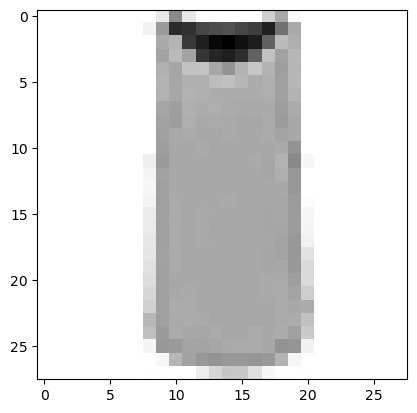

In [11]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2], cmap='binary')

# Functional API (more flexible, to build custom model)

In [45]:
#Functional API

input_layer = tf.keras.layers.Input(shape=(28, 28))

flatten = Flatten()(input_layer)
dense1 = Dense(128, activation="relu")(flatten)
dense2 = Dense(64, activation="relu")(dense1)
output_layer = Dense(10, activation="softmax")(dense2)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
optimizer = tf.keras.optimizers.Adam()

In [49]:
model.compile(optimizer=optimizer,
    loss=loss,
    metrics=['accuracy'])

In [53]:
history = model.fit(X_train, y_train, validation_data = (X_train, y_train), epochs = 10)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9082 - loss: 0.2746 - val_accuracy: 0.9154 - val_loss: 0.2401
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9135 - loss: 0.2404 - val_accuracy: 0.9308 - val_loss: 0.2040
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.2325 - val_accuracy: 0.9256 - val_loss: 0.2075
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9071 - loss: 0.2533 - val_accuracy: 0.9204 - val_loss: 0.2217
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9041 - loss: 0.2615 - val_accuracy: 0.9350 - val_loss: 0.1856
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9263 - loss: 0.1996 - val_accuracy: 0.9396 - val_loss: 0.1737
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9222 - loss: 0.2096 - val_accuracy: 0.9348 - val_loss: 0.1865
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9215 - loss: 0.2054 - val_accuracy: 0.

In [16]:
X_train.shape

(5000, 28, 28)

# Extracting output from layers in the model

## Output from a single layer

In [60]:
model = tf.keras.models.Model(inputs=input_layer, outputs=model.layers[-2].output) #extracting the output of the [-2] layers

In [62]:
model.summary() #output with 64 neurals

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,736 (424.75 KB)

 Trainable params: 108,736 (424.75 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.predict(X_train).shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step


(5000, 64)

## Ouput from multiple layers

In [68]:
model = tf.keras.models.Model(inputs=input_layer, outputs=[layer.output for layer in model.layers]) #extracting the output from all layers

In [76]:
features = model.predict(X_train)
for feature in features:
    print(feature.shape)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
(5000, 28, 28)
(5000, 784)
(5000, 128)
(5000, 64)
